In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sqlalchemy import create_engine

# Database connection details
db_user = "postgres"
db_password = "30251421"  
db_host = "localhost"
db_port = "5432"
db_name = "telecom"
engine = create_engine(f"postgresql+pg8000://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")


In [3]:
query = "SELECT * FROM xdr_data;"
df = pd.read_sql(query, engine)

In [5]:
df["Total_Data_Volume"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]
aggregated_df = df.groupby("MSISDN/Number").agg(
    num_sessions=("Bearer Id", "count"),
    total_duration=("Dur. (ms)", "sum"),
    total_download=("Total DL (Bytes)", "sum"),
    total_upload=("Total UL (Bytes)", "sum"),
    total_data=("Total_Data_Volume", "sum")
).reset_index()
print(aggregated_df.head())



   MSISDN/Number  num_sessions  total_duration  total_download  total_upload  \
0   3.360100e+10             2        233440.0    1.685275e+09    72106216.0   
1   3.360100e+10             2        362460.0    2.415104e+08    72208918.0   
2   3.360100e+10             2        269938.0    1.113319e+09    78613640.0   
3   3.360101e+10             2         99756.0    8.039863e+08    40655052.0   
4   3.360101e+10             4         74208.0    2.726261e+09   188561054.0   

     total_data  
0  1.757381e+09  
1  3.137193e+08  
2  1.191933e+09  
3  8.446414e+08  
4  2.914822e+09  


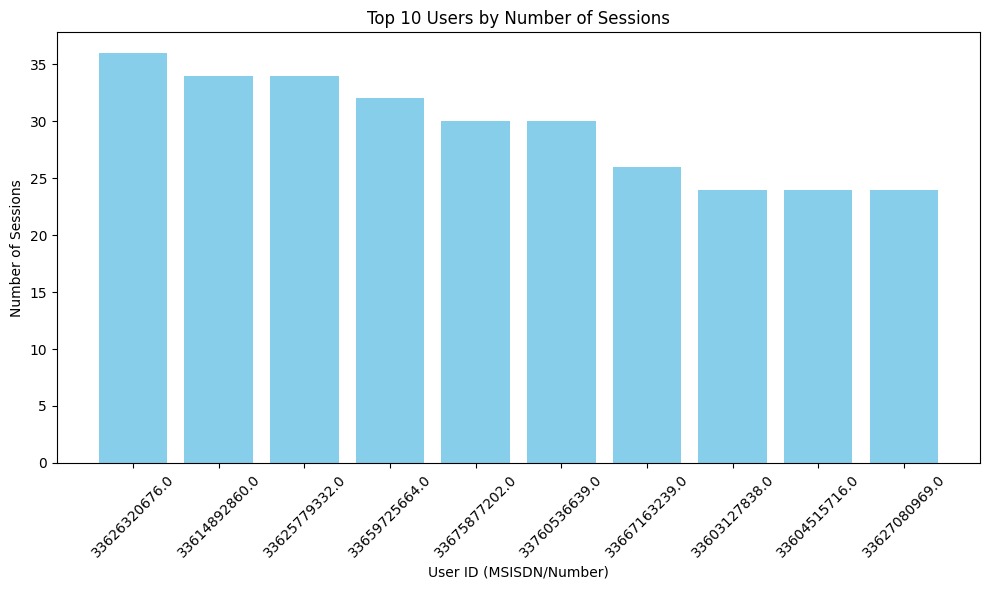

In [6]:
top_users = aggregated_df.nlargest(10, "num_sessions")

plt.figure(figsize=(10, 6))
plt.bar(top_users["MSISDN/Number"].astype(str), top_users["num_sessions"], color='skyblue')
plt.title("Top 10 Users by Number of Sessions")
plt.xlabel("User ID (MSISDN/Number)")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()